In [2]:
#import libraries
import requests, zipfile
import pandas as pd
import io
import os
import numpy as np 
import tensorflow as tf
from matplotlib import pyplot as plt
from io import StringIO
import itertools as it
from datetime import datetime
import sklearn as sklearn
np.set_printoptions(threshold=sys.maxsize)
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import math 

[1.0, 0.9951847266721969, 0.9807852804032304, 0.9569403357322088, 0.9238795325112867, 0.881921264348355, 0.8314696123025452, 0.773010453362737, 0.7071067811865476, 0.6343932841636455, 0.5555702330196023, 0.4713967368259978, 0.38268343236508984, 0.29028467725446233, 0.19509032201612833, 0.09801714032956077, 6.123233995736766e-17, -0.09801714032956065, -0.1950903220161282, -0.29028467725446216, -0.3826834323650897, -0.4713967368259977, -0.555570233019602, -0.6343932841636454, -0.7071067811865475, -0.773010453362737, -0.8314696123025453, -0.8819212643483549, -0.9238795325112867, -0.9569403357322088, -0.9807852804032304, -0.9951847266721968, -1.0, -0.9951847266721969, -0.9807852804032304, -0.9569403357322089, -0.9238795325112868, -0.881921264348355, -0.8314696123025455, -0.7730104533627371, -0.7071067811865477, -0.6343932841636459, -0.5555702330196022, -0.47139673682599786, -0.38268343236509034, -0.29028467725446244, -0.19509032201612866, -0.09801714032956045, -1.8369701987210297e-16, 0.09

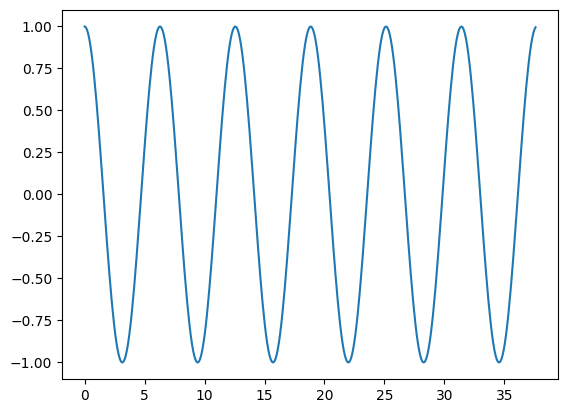

In [86]:
#define a cos function
x = [[a] for a in np.arange(0, math.pi*12, math.pi/32)]
x = np.array(x)
y = [math.cos(a) for a in x]
print(y)
plt.plot(x, y)
plt.show()

In [60]:
def prepare_y_series(np_array, series_size = 8):
    x_series = []
    y_series = []
    for y_val in range(len(np_array)-series_size):
        x_series.append([[a] for a in np_array[y_val:y_val+series_size]])
        y_series.append(np_array[y_val+series_size])
    return np.array(x_series), np.array(y_series)
x_series_def, y_series_def = prepare_y_series(y)
print(x_series_def, y_series_def)

[[[ 1.00000000e+00]
  [ 9.95184727e-01]
  [ 9.80785280e-01]
  [ 9.56940336e-01]
  [ 9.23879533e-01]
  [ 8.81921264e-01]
  [ 8.31469612e-01]
  [ 7.73010453e-01]]

 [[ 9.95184727e-01]
  [ 9.80785280e-01]
  [ 9.56940336e-01]
  [ 9.23879533e-01]
  [ 8.81921264e-01]
  [ 8.31469612e-01]
  [ 7.73010453e-01]
  [ 7.07106781e-01]]

 [[ 9.80785280e-01]
  [ 9.56940336e-01]
  [ 9.23879533e-01]
  [ 8.81921264e-01]
  [ 8.31469612e-01]
  [ 7.73010453e-01]
  [ 7.07106781e-01]
  [ 6.34393284e-01]]

 [[ 9.56940336e-01]
  [ 9.23879533e-01]
  [ 8.81921264e-01]
  [ 8.31469612e-01]
  [ 7.73010453e-01]
  [ 7.07106781e-01]
  [ 6.34393284e-01]
  [ 5.55570233e-01]]

 [[ 9.23879533e-01]
  [ 8.81921264e-01]
  [ 8.31469612e-01]
  [ 7.73010453e-01]
  [ 7.07106781e-01]
  [ 6.34393284e-01]
  [ 5.55570233e-01]
  [ 4.71396737e-01]]

 [[ 8.81921264e-01]
  [ 8.31469612e-01]
  [ 7.73010453e-01]
  [ 7.07106781e-01]
  [ 6.34393284e-01]
  [ 5.55570233e-01]
  [ 4.71396737e-01]
  [ 3.82683432e-01]]

 [[ 8.31469612e-01]
  [ 7.73

In [61]:
mamfmodel = tf.keras.models.Sequential()
mamfmodel.add(tf.keras.layers.InputLayer((8, 1)))
mamfmodel.add(tf.keras.layers.LSTM(units = 64))
mamfmodel.add(tf.keras.layers.Dense(8, 'relu'))
mamfmodel.add(tf.keras.layers.Dense(1, 'linear'))
mamfmodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [62]:
cp = tf.keras.callbacks.ModelCheckpoint('mamfmodel/', save_best_only=True)
mamfmodel.compile(loss='mean_squared_error', optimizer='adam',metrics= tf.keras.metrics.RootMeanSquaredError())
mamfmodel.fit(x_series_def, y_series_def, epochs=40, callbacks=[cp])

Epoch 1/40
12/12 [==============================] - 2s 4ms/step - loss: 0.3574 - root_mean_squared_error: 0.5978
Epoch 2/40
12/12 [==============================] - 0s 3ms/step - loss: 0.1573 - root_mean_squared_error: 0.3966
Epoch 3/40
12/12 [==============================] - 0s 3ms/step - loss: 0.0944 - root_mean_squared_error: 0.3073
Epoch 4/40
12/12 [==============================] - 0s 3ms/step - loss: 0.0779 - root_mean_squared_error: 0.2790
Epoch 5/40
12/12 [==============================] - 0s 3ms/step - loss: 0.0661 - root_mean_squared_error: 0.2571
Epoch 6/40
12/12 [==============================] - 0s 3ms/step - loss: 0.0479 - root_mean_squared_error: 0.2189
Epoch 7/40
12/12 [==============================] - 0s 3ms/step - loss: 0.0330 - root_mean_squared_error: 0.1816
Epoch 8/40
12/12 [==============================] - 0s 3ms/step - loss: 0.0189 - root_mean_squared_error: 0.1376
Epoch 9/40
12/12 [==============================] - 0s 3ms/step - loss: 0.0080 - root_mean_squar

12/12 [==============================] - 0s 1ms/step


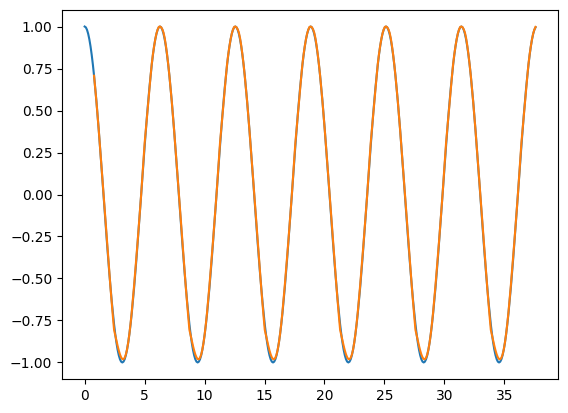

In [65]:
y_pred = mamfmodel.predict(x_series_def)
plt.plot(x, y)
plt.plot(x[8:],y_pred)
plt.show()

1/1 [==============================] - 0s 31ms/step
(384, 1)
(768,)
384


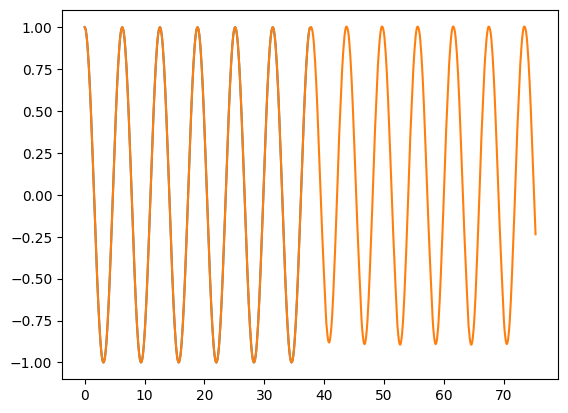

In [91]:
def bracket_list(list):
    new_list = []
    for value in range(len(list)):
        new_value = [list[value]]
        new_list.append(new_value)
    return np.array([new_list])

def predict_next(model_ker : tf.keras.models, data , epoch = 16):
    last_series = np.array([data[-1]])
    last_data = []
    for i in range(epoch):
        pred = model_ker.predict(last_series).flatten()
        new_pred_series = np.delete(last_series, 0)
        new_pred_series = np.append(new_pred_series, pred)
        new_pred_series = bracket_list(new_pred_series)
        last_series = new_pred_series
        last_data.append(pred)
    return np.array(last_data)
y_next = predict_next(mamfmodel, x_series_def, 384)
print(y_next.shape)
x_new = [[a] for a in np.arange(0, math.pi*24, math.pi/32)]
y_new = np.append(np.array(y), np.array(y_next))
print(y_new.shape)
print(len(x))
plt.plot(x, y)
plt.plot(x_new, y_new)
plt.show()